In [6]:
%reset

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
import matplotlib
from getdist import plots, MCSamples
import scipy.integrate as integrate
import pdb

matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
channel = 'Tau'

if (channel == 'Tau'):
    #posterior_samp_files = ['abc_nrgybin10_smc_adap4_nsamp200_withbgTrue_varyMxTrue_nparam3_tau_default_NE10_MMin1_10yr_run3_batch16_hopefullyfinal.pk']
    posterior_samp_files = ['abc_nrgybin10_smc_adap1_nsamp200_withbgTrue_varyMxTrue_nparam3_tau_default_NE10_MMin1_10yr_masked01_run3_maxiter1_batch16_01.pk']
if (channel == 'b'):
    posterior_samp_files = ['abc_nrgybin10_smc_adap1_nsamp400_withbgTrue_varyMxTrue_nparam3_b_default_NE10_MMin1_10yr_run3_batch16_hopefullyfinal.pk']
    
post_samps = []
for ii in range(0,len(posterior_samp_files)):
    posterior_samples = pk.load(open("../data/ABC_posteriors/" + posterior_samp_files[ii], 'rb'))
    #posterior_samples_atsmc = pk.load(open("./data/ABC_posteriors/BinnedABCposterior_samples_atsmc.pk", 'rb'))
    post_samps.append(posterior_samples)

Removed no burn in
abc_nrgybin10_smc_adap1_nsamp200_withbgTrue_varyMxTrue_nparam3_tau_default_NE10_MMin1_10yr_masked01_run3_maxiter1_batch16_01


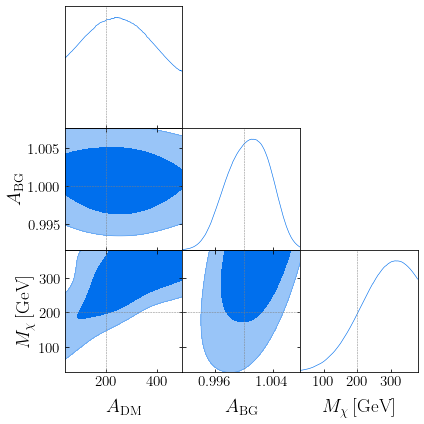

In [11]:
def get_labels(names):
    labels = []
    for ni in names:
        if ni == 'ADM':
            labels.append('A_{\mathrm{DM}}')
        if ni == 'bgnorm':
            labels.append('A_{\mathrm{BG}}')
        if ni == 'MDM':
            labels.append('M_{\\chi}\,[\mathrm{GeV}]')
    return labels

getdist_samps = []
for fi in range(0,len(post_samps)):
    param_min = post_samps[fi]['param_min']
    param_max = post_samps[fi]['param_max']
    param_names = post_samps[fi]['param_names']
    param_true = post_samps[fi]['true_params']
    weights = post_samps[fi]['weights']
    
    # Getdist requires specification of parameter ranges to get accurate contours
    ranges = {}
    markers={} #true parameter values
    for pi in range(0,len(param_min)):
        if (pi < 2):
            ranges[param_names[pi]] = [param_min[pi], param_max[pi]]
            markers[param_names[pi]] = param_true[pi]
        else:
            ranges[param_names[pi]] = [param_min[pi]/1000., param_max[pi]/1000.]
            markers[param_names[pi]] = param_true[pi]/1000.
            
    
    param_labels = get_labels(param_names)
    temp = np.copy(post_samps[fi]['samples'])
    temp[:,2] = temp[:,2]/1000.  #convert mass to GeV
    getdist_sampfi = MCSamples(samples =temp, ranges = ranges, names = param_names,\
                       labels = param_labels, weights = weights)    
    getdist_samps.append(getdist_sampfi)

if (1):
    g = plots.get_subplot_plotter()
    g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
    g.settings.axes_fontsize=18
    g.settings.legend_fontsize = 26
    g.settings.axes_labelsize = 22
    g.triangle_plot(getdist_samps, filled=True, markers=markers)
    
    print(posterior_samp_files[0][:-3])
    g.export(posterior_samp_files[0][:-3] + '_triangleplot.pdf')